<a href="https://colab.research.google.com/github/BartekFranczak/CPO---MEL/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files 

uploaded = files.upload()

Saving lab03.zip to lab03.zip


In [6]:
from zipfile import ZipFile

file_name = '/content/lab03.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()



In [11]:
import os
from os import path
if path.exists('/content/results')==False:
  os.mkdir('/content/results')

In [16]:
from os import listdir 
from os.path import join

path = '/content'

path_sp = join(path,'sp')
path_ga = join(path,'ga')
path_gray = join(path,"gray")

list_sp = [join(path_sp, p) for p in listdir(path_sp)]
list_ga = [join(path_ga, p) for p in listdir(path_ga)]
list_gray = [join(path_gray, p) for p in listdir(path_gray)]

import random 
def pick_random_files(ls1,ls2,ls3, n):
  numbers = random.sample(range(0,len(ls1)),n)
  l1 = [ls1[n] for n in numbers]
  l2 = [ls2[n] for n in numbers]
  l3 = [ls3[n] for n in numbers]
  return l1+l2+l3

file_paths = pick_random_files(list_gray, list_sp, list_ga, 2)
print(file_paths)

['/content/gray/2.jpg', '/content/gray/20.jpg', '/content/sp/2.jpg', '/content/sp/20.jpg', '/content/ga/2.jpg', '/content/ga/20.jpg']


# Zadanie 1 Poprawa jakości obrazu

A) Rozciąganie histogramu 

In [32]:
from PIL import Image
import numpy as np 

In [88]:
def histogram_streaching(im_path):
  im = Image.open(im_path)
  im = np.asarray(im)
  min_val = np.min(im)
  max_val = np.max(im)
  im = (im -min_val)/(max_val-min_val)*255
  return im

def histogram_equalization(im_path):
  im = Image.open(im_path)
  im = np.asarray(im)
  unique_val = np.unique(im, return_counts=True)
  im_size = im.size
  values = unique_val[0]
  counts = unique_val[1]
  p = counts/im_size
  c = np.zeros(p.shape)
  for i in range(p.size):
    c[i] = np.sum(p[:(i+1)])
  
  c_min = np.min(c)
  
  im_eq = np.zeros(im.shape)

  H,W= im.shape

  for h in range(H):
    for w in range(W):
      val = im[h][w]
      idx = np.where(values==val)
      idx = np.sum(idx)
      im_eq[h][w]= np.round(((c[idx]-c_min)/(1-c_min))*(values.size-1))
  return im_eq


(array([[25.,  8.,  1., ..., 59.,  1.,  9.],
        [28.,  2.,  0., ..., 66.,  1., 11.],
        [29.,  4.,  2., ..., 65.,  3.,  7.],
        ...,
        [44., 71., 40., ...,  4.,  2.,  7.],
        [63., 64., 37., ...,  5.,  0., 15.],
        [34., 86., 45., ...,  7.,  4.,  2.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 500 BarContainer objects>)

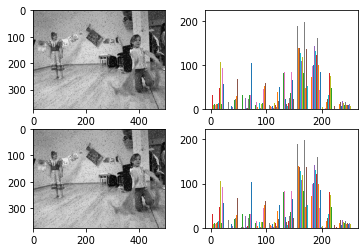

In [86]:
import matplotlib.pyplot as plt

plt.figure()
im = Image.open('/content/sp/5.jpg')
im = np.asarray(im)
im1 = histogram_streaching('/content/sp/5.jpg')
plt.subplot(2,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(2,2,2)
plt.hist(im)
plt.subplot(2,2,3)
plt.imshow(im1,cmap='gray')
plt.subplot(2,2,4)
plt.hist(im1)


(array([[ 34.,   6.,  70., ...,  34.,  15.,  10.],
        [ 30.,   5.,  72., ...,  29.,  17.,  12.],
        [ 33.,   8.,  70., ...,  28.,  17.,  10.],
        ...,
        [126.,  68.,  81., ...,   1.,   2.,  10.],
        [137.,  61.,  67., ...,   2.,   3.,  15.],
        [135.,  62.,  79., ...,   3.,   1.,   6.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 500 BarContainer objects>)

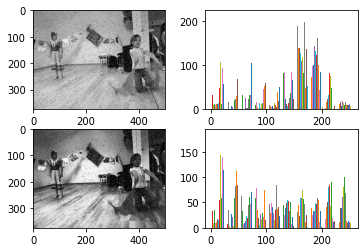

In [89]:
plt.figure()
im = Image.open('/content/sp/5.jpg')
im = np.asarray(im)
im1 = histogram_equalization('/content/sp/5.jpg')
plt.subplot(2,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(2,2,2)
plt.hist(im)
plt.subplot(2,2,3)
plt.imshow(im1,cmap='gray')
plt.subplot(2,2,4)
plt.hist(im1)